<a href="https://colab.research.google.com/github/KIVILCIIM/Data-Science/blob/main/data_scince_olimpic_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
#not to have warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#insert the dataset
path= "/content/drive/MyDrive/BTK/DATASET/veriseti_20220203_olimpiyatlar.csv"
veri = pd.read_csv(path) #cvs=coma seperated value
veri.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Lets check the details of the dataset then try to make some changes in the dataset


In [ ]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
veri.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
#change the column names
veri.rename(columns={"ID"    :  "id",
                     "Name"  :  "ad",
                     "Gender":  "cinsiyet",
                     "Age"   :  "yas",
                     "Height":  "boy",
                     "Weight":  "kilo",
                     "Team"  :  "takım",
                     "NOC"   :  "uok",
                     "Games" :  "oyunlar",
                     "Year"  :  "yıl",
                     "Season":  "sezon",
                     "City"  :  "sehir",
                     "Sport" :  "spor",
                     "Event" :  "etkinlik",
                     "Medal" :  "madalya" }, inplace= True)
#New names will be replaced with the old ones in the dataset
veri.head(2)

,id,ad,cinsiyet,yas,boy,kilo,takım,uok,oyunlar,yıl,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [ ]:
#lets drop id and game columns
veri= veri.drop(["id", "oyunlar"], axis=1) #axis=1 means column
veri.head(2)

,ad,cinsiyet,yas,boy,kilo,takım,uok,yıl,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


How to handle missing value?
In the dataset some datas are missing. It is shown as NaN (not a number). Two different methods will be used here to handle "missing value" issue.

First method; the average height and weight value will be found for every unique sport event then missing values ​​will be replaced with the average value in that specific sport event.

Second; the age value will be filled with the average of all sport people's average age.

In [ ]:
essiz_etkinlik = pd.unique(veri.etkinlik) #to see how many unique events are in the dataset
print("Unique  event number: {}".format(len(essiz_etkinlik)))
essiz_etkinlik[:10]

Unique  event number: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [ ]:
veri.columns

Index(['ad', 'cinsiyet', 'yas', 'boy', 'kilo', 'takım', 'uok', 'yıl', 'sezon',
       'sehir', 'spor', 'etkinlik', 'madalya'],
      dtype='object')

In [ ]:
veri_gecici = veri.copy()  # Make a copy of the original dataset
boy_kilo_liste = ["boy", "kilo"]

for e in essiz_etkinlik:
    # Create a filter for the current event
    etkinlik_filtre= veri_gecici.etkinlik == e
    # Filter the data for this event
    veri_filtreli = veri_gecici[etkinlik_filtre]

    for s in boy_kilo_liste:
        # Calculate the average for the specific event
        ortalama = np.round(np.mean(veri_filtreli[s]), 2)

        if ~np.isnan(ortalama):
          veri_filtreli[s]= veri_filtreli[s].fillna(ortalama)
        else:
            # If no valid average for the event, use the overall column average
            tum_gecici_veri= np.round(np.mean(veri[s]), 2)
            if not np.isnan(tum_gecici_veri):  # Ensure global average is also valid
                veri_filtreli[s] = veri_filtreli[s].fillna(tum_gecici_veri).copy()
            else:
              tum_veri_ortalaması = np.round(np.mean(veri[s]),2)
              veri_filtreli[s]=veri_filtreli[s].fillna(tum_veri_ortalaması)
    veri_gecici[etkinlik_filtre]= veri_filtreli

    # Update the temporary data with the modified filtered data
    veri_gecici.loc[etkinlik_filtre, :] = veri_filtreli
veri=veri_gecici.copy()
veri.info() #lets see if we have any missing value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ad        271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takım     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yıl       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [ ]:
veri.head(10)

,ad,cinsiyet,yas,boy,kilo,takım,uok,yıl,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.00,80.00,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.00,60.00,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,177.48,73.09,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.00,82.00,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,21.0,185.00,82.00,Netherlands,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,Christine Jacoba Aaftink,F,25.0,185.00,82.00,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,Christine Jacoba Aaftink,F,25.0,185.00,82.00,Netherlands,NED,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,Christine Jacoba Aaftink,F,27.0,185.00,82.00,Netherlands,NED,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,Christine Jacoba Aaftink,F,27.0,185.00,82.00,Netherlands,NED,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [ ]:
#lets find undefined age values in the dataset
# undefined age values will be found
yas_ort= np.round(np.mean(veri.yas),2)
print ("Age average: {}".format(yas_ort))
veri["yas"]= veri["yas"].fillna(yas_ort)
veri.info()

Age average: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ad        271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takım     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yıl       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


Lets remove the non-medalist sports people from the dataset

In [ ]:
madalya_deg=veri["madalya"]
pd.isnull(madalya_deg).sum()

231333

In [ ]:
madalya_deg_filtresi= ~pd.isnull(madalya_deg)

In [ ]:
veri=veri[madalya_deg_filtresi]
veri.head(5)

,ad,cinsiyet,yas,boy,kilo,takım,uok,yıl,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [ ]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ad        39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takım     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yıl       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [ ]:
veri.to_csv("olimpics_exracted.csv", index= False)

In [ ]:
#create a function for histogram
def plotHistogram(degisken):
  plt.figure()
  plt.hist(veri[degisken], bins=95, color= "pink")
  plt.xlabel(degisken)
  plt.ylabel("Freakans")
  plt.title("Veri sıklığı - {}".format(degisken))
  plt.show()

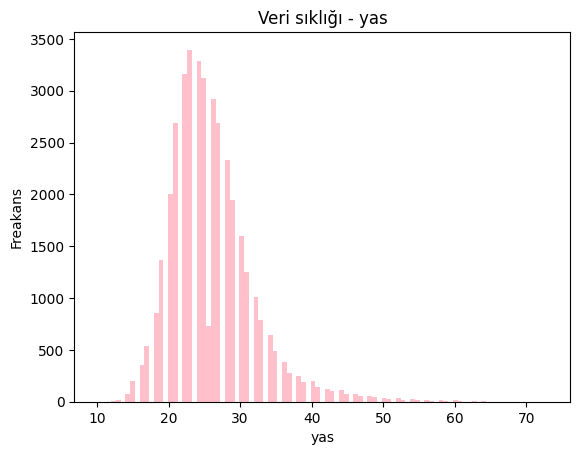

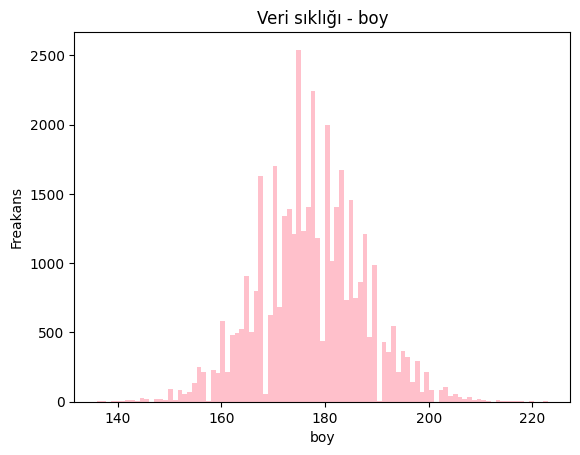

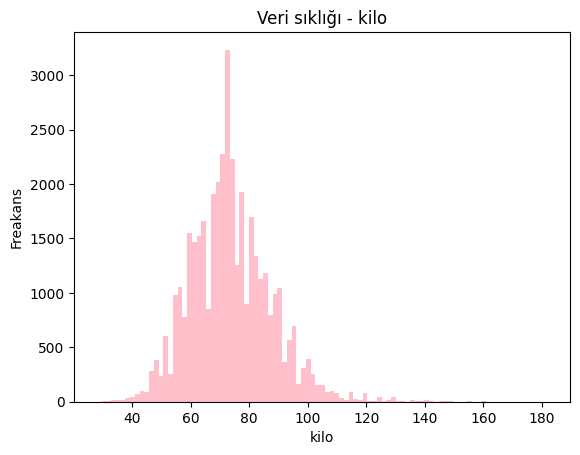

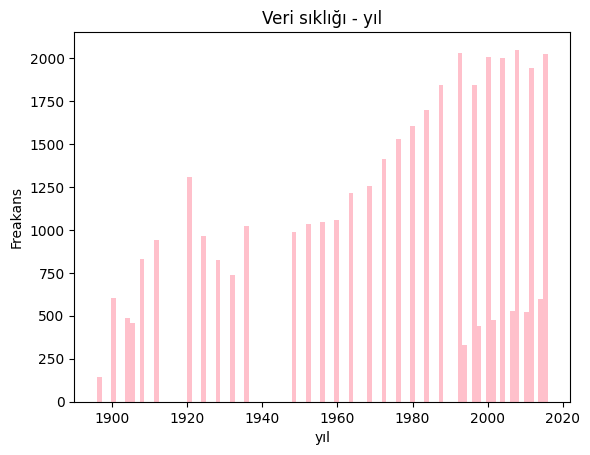

In [ ]:
sayisal_degisken= ["yas", "boy", "kilo", "yıl"]
for i in sayisal_degisken:
  plotHistogram(i)

In [ ]:
veri.describe()

,yas,boy,kilo,yıl
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


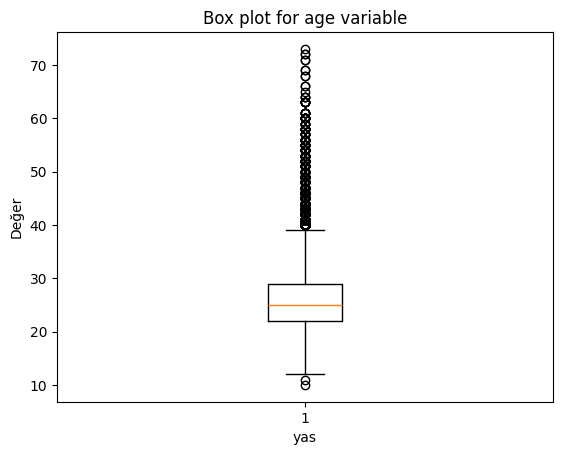

In [ ]:
plt.boxplot(veri.yas)
plt.title("Box plot for age variable")
plt.xlabel("yas")
plt.ylabel("Değer")
plt.show()

In [ ]:
#lets create a method for bar chart
def plotBar(degisken, n=5):
  """
      input: variable/column name
         n= there will ne n number of output
      output: bar chart
  """
  veri_= veri[degisken]
  veri_sayma = veri_.value_counts()
  veri_sayma = veri_sayma[:n]
  plt.figure()
  plt.bar(veri_sayma.index, veri_sayma, color = "pink")
  plt.xticks(veri_sayma.index, veri_sayma.index.values)
  plt.xticks(rotation=45)
  plt.ylabel("Frakens")
  plt.title("Veri sıklığı - {}".format(degisken))
  plt.show()
  print("{}: \n ".format(degisken, veri_sayma))



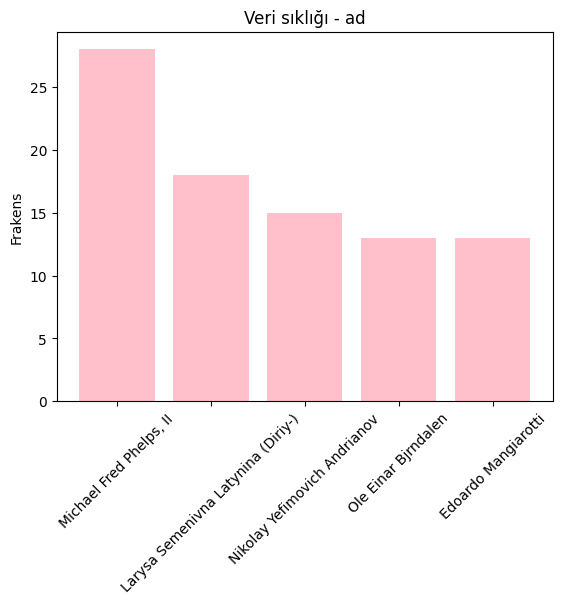

ad: 
 


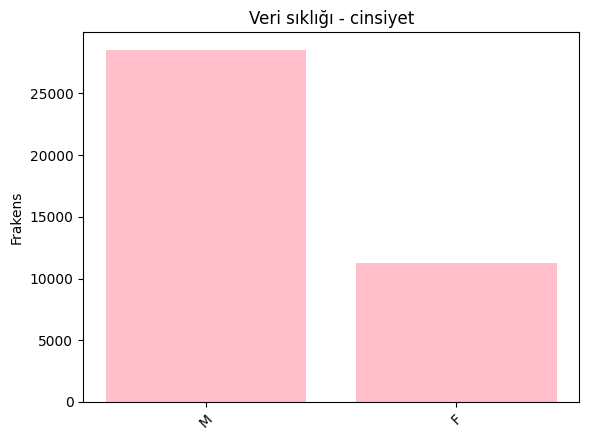

cinsiyet: 
 


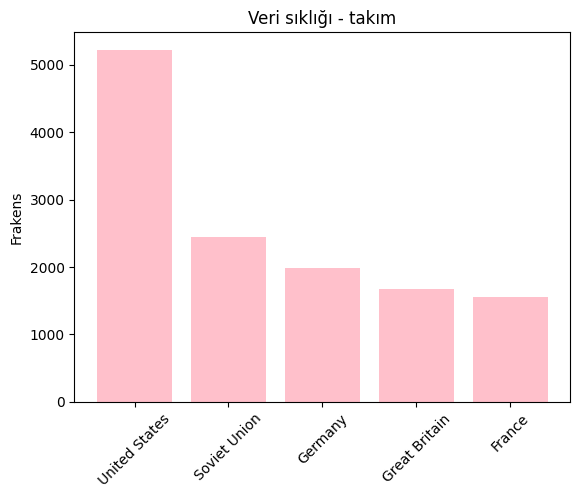

takım: 
 


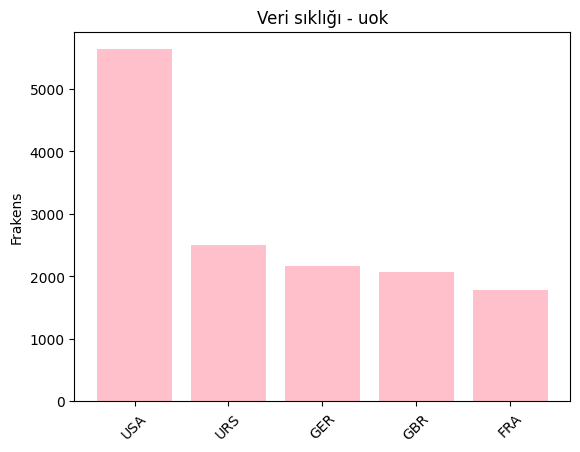

uok: 
 


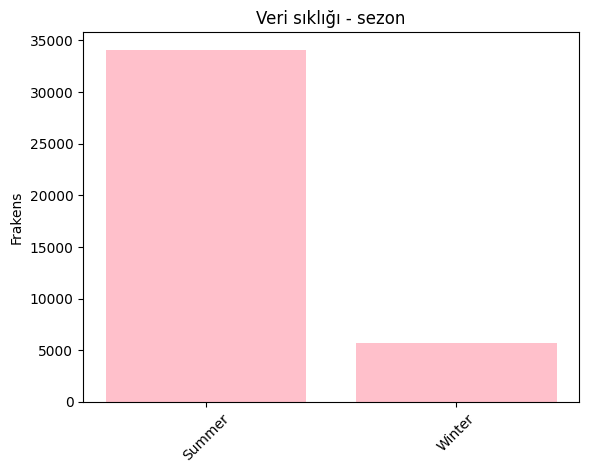

sezon: 
 


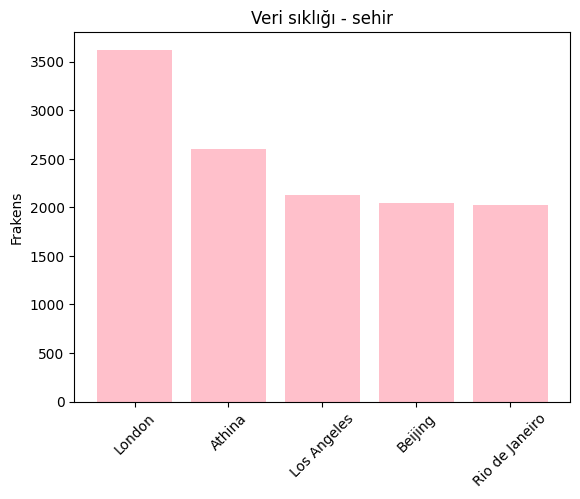

sehir: 
 


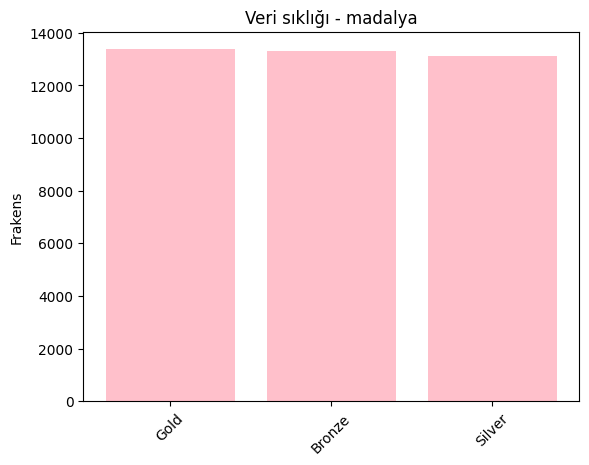

madalya: 
 


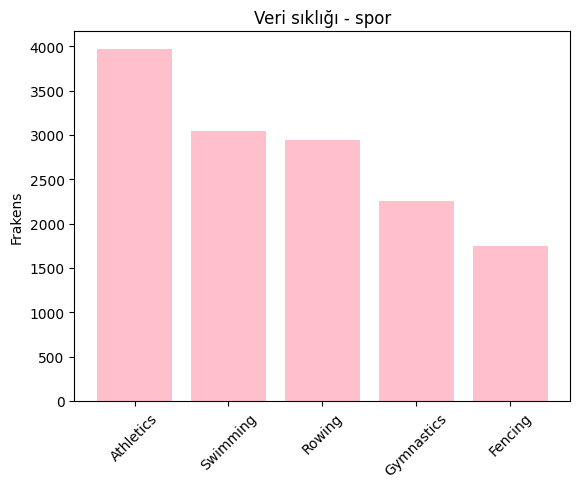

spor: 
 


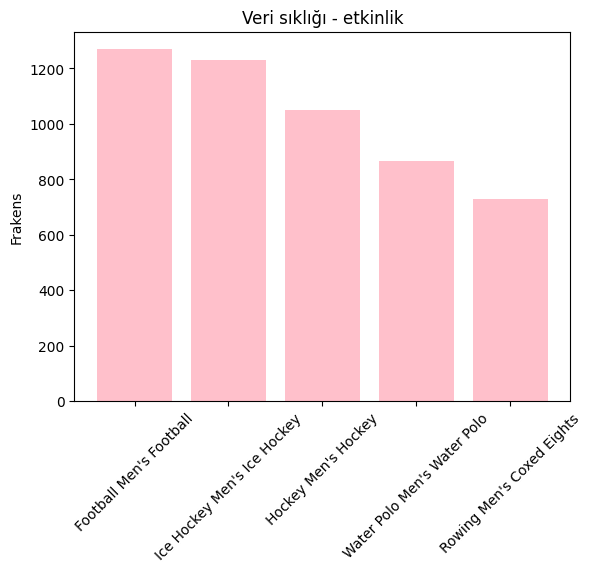

etkinlik: 
 


In [ ]:
kategorik_deg= ["ad", "cinsiyet", "takım", "uok", "sezon", "sehir", "madalya", "spor", "etkinlik"]
for i in kategorik_deg:
  plotBar(i)

In [ ]:
erkek=veri[veri.cinsiyet== "M"]
erkek.head(3)

,ad,cinsiyet,yas,boy,kilo,takım,uok,yıl,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [ ]:
kadin=veri[veri.cinsiyet=="F"]
kadin.head(3)

,ad,cinsiyet,yas,boy,kilo,takım,uok,yıl,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


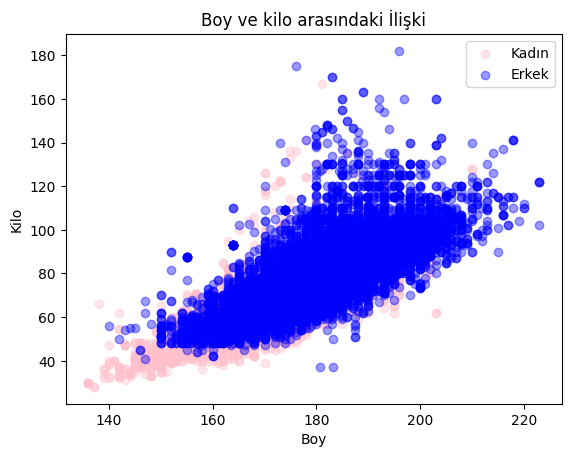

In [ ]:
plt.figure()
plt.scatter(kadin.boy, kadin.kilo, alpha= 0.4, label= "Kadın", color= "pink")
plt.scatter(erkek.boy, erkek.kilo, alpha= 0.4, label= "Erkek", color = "blue")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve kilo arasındaki İlişki")
plt.legend()
plt.show()


In [ ]:
veri.loc[:, ["yas", "boy", "kilo"]].corr()

,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


Lets see if there is relation between age and medal with using "get_dummies" function

In [ ]:
veri_gecicici= veri.copy()
veri_gecicici = pd.get_dummies(veri_gecicici, columns=["madalya"])
veri_gecicici.head(12)

,ad,cinsiyet,yas,boy,kilo,takım,uok,yıl,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,False,True,False
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,True,False,False
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,True,False,False
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,True,False,False
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,True,False,False
42,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,False,True,False
44,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,False,True,False
48,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,False,True,False
50,Paavo Johannes Aaltonen,M,32.0,175.00,64.00,Finland,FIN,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,True,False,False
60,Kjetil Andr Aamodt,M,20.0,176.00,85.00,Norway,NOR,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,False,True,False


In [ ]:
veri_gecicici.loc[:,["yas", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


In [ ]:
veri_gecicici[["takım", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].groupby(["takım"], as_index = False).sum().sort_values(by="madalya_Gold", ascending = False)[:10]

,takım,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233,2474,1512
403,Soviet Union,677,1058,716
165,Germany,678,679,627
215,Italy,484,535,508
171,Great Britain,572,519,582
149,France,577,455,518
420,Sweden,507,451,476
198,Hungary,365,432,330
67,Canada,408,422,413
117,East Germany,263,369,309


In [ ]:
veri_gecicici[["sehir", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].groupby(["sehir"], as_index = False).sum().sort_values(by="madalya_Gold", ascending = False)[:10]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214,1215,1195
3,Athina,860,883,859
18,Los Angeles,706,726,691
6,Beijing,710,671,667
27,Rio de Janeiro,703,665,655
38,Sydney,680,663,661
4,Atlanta,629,608,605
5,Barcelona,604,559,549
33,Seoul,549,520,513
2,Antwerpen,367,493,448


In [ ]:
veri_gecicici[["cinsiyet", "madalya_Bronze", "madalya_Gold", "madalya_Silver"]].groupby(["cinsiyet"], as_index = False).sum().sort_values(by="madalya_Gold", ascending = False)

,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524,9625,9381
0,F,3771,3747,3735


In [ ]:
veri_pivot = veri.pivot_table(index="madalya", columns="cinsiyet",
                              values=["boy","kilo","yas"], aggfunc={"boy": np.mean, "kilo": np.mean, "yas": [min, max, np.std]})
veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0   
Gold      170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0   
Silver    170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

Anomaly detection

In [ ]:
def anomalyDetection(df, ozellik):
  outlier_indices = []

  for c in ozellik:
    #1. çeyrek
    Q1 = np.percentile(df[c], 25)

    #3. çeyrek
    Q3 = np.percentile(df[c], 75)

    #IQR Inter quartile range
    IQR = Q3 - Q1

    #Alt Limit
    outlier_step = 1.5 * IQR
    outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step )].index #aykırı değer tanımı yapıldı
    #tespit edilen indisleri depolayalım
    outlier_indices.extend(outlier_list_col)

  outlier_indices = Counter(outlier_indices) #bir satır birden fazla "aykırı değer" alabilir
  multiple_outliers = list( i for i, v in outlier_indices.items() if v > 1)
  return multiple_outliers


In [ ]:
veri_anomali= veri.loc[anomalyDetection(veri, ["yas", "kilo", "boy"])]
veri_anomali.spor.value_counts()

,count
spor,
Basketball,64
Gymnastics,34
Handball,6
Athletics,5
Sailing,3
Diving,3
Shooting,1
Figure Skating,1
Wrestling,1


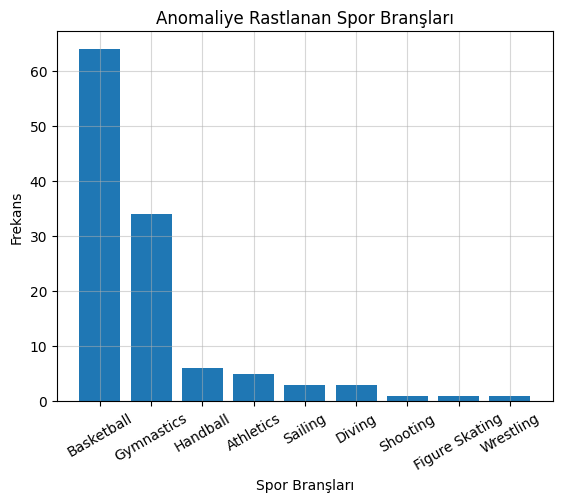

In [ ]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index, veri_anomali.spor.value_counts().values)
plt.xticks(rotation = 30)
plt.title("Anomaliye Rastlanan Spor Branşları")
plt.ylabel("Frekans")
plt.xlabel("Spor Branşları")
plt.grid(True, alpha= 0.5)
plt.show()

In [ ]:
veri.gymnastic = veri_anomali[veri_anomali.spor == "Gymnastics"]
veri.gymnastic

,ad,cinsiyet,yas,boy,kilo,takım,uok,yıl,sezon,sehir,spor,etkinlik,madalya
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
53759,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
69216,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
69222,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
69225,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
80497,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


In [ ]:
veri.gymnastic.etkinlik.value_counts()

,count
etkinlik,
Gymnastics Women's Team All-Around,21
Gymnastics Women's Uneven Bars,6
Gymnastics Women's Balance Beam,3
Gymnastics Women's Floor Exercise,2
Gymnastics Women's Individual All-Around,1
Gymnastics Women's Horse Vault,1


In [ ]:
veri_basketbol = veri_anomali[veri_anomali.spor == "Basketball"]
veri_basketbol

,ad,cinsiyet,yas,boy,kilo,takım,uok,yıl,sezon,sehir,spor,etkinlik,madalya
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270119,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Silver
270120,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
270121,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
270740,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


In [ ]:
veri_basketbol.etkinlik.value_counts()

,count
etkinlik,
Basketball Men's Basketball,62
Basketball Women's Basketball,2


Data analysis in time series

In [ ]:
veri_zaman = veri.copy()
veri_zaman.head(3)

,ad,cinsiyet,yas,boy,kilo,takım,uok,yıl,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [ ]:
olimpic_years = veri_zaman.yıl.unique()
olimpic_years

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896])

In [ ]:
#lets list the olimpic years
dizili_array = np.sort(veri_zaman.yıl.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

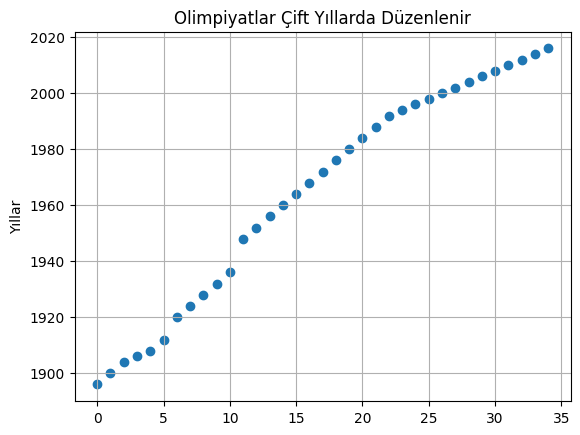

In [ ]:
plt.figure()
plt.scatter(range(len(dizili_array)), dizili_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()

In [ ]:
tarih_saat_nesnesi = pd.to_datetime(veri_zaman["yıl"], format = "%Y")
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


,yıl
3,1900-01-01
37,1920-01-01
38,1920-01-01


In [ ]:
veri_zaman["tarih_saat"]= tarih_saat_nesnesi
veri_zaman.head(3)

,ad,cinsiyet,yas,boy,kilo,takım,uok,yıl,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


Lets use some functions for date-time index variables

In [ ]:
# veri_zaman değişkeninin ana indeksini date-time tipi olan tarih-zaman değerine güncelleyelim
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yıl"], axis=1, inplace = True)


In [ ]:
veri_zaman.head(3)

,ad,cinsiyet,yas,boy,kilo,takım,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
